In [26]:
import os, glob
from os import startfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio, Video
import librosa
import librosa.display

# Get all music ids in test data

In [27]:
test_ids = [os.path.basename(x)[:-4] for x in glob.glob('public_test/full_song/*.mp3')]
# it's already unique
print("Nof test full songs:", len(test_ids))
test_ids[:5]

Nof test full songs: 419


['1073742443', '1073742791', '1073743276', '1073743566', '1073744067']

# Get all music ids in train data

In [28]:
df = pd.read_csv('train/train_meta.csv')
df.head()

,music_id,song_path,hum_path
0,1075110394,train/song/0000.mp3,train/hum/0000.mp3
1,1079628790,train/song/0001.mp3,train/hum/0001.mp3
2,1078271932,train/song/0002.mp3,train/hum/0002.mp3
3,1076457212,train/song/0003.mp3,train/hum/0003.mp3
4,1073861056,train/song/0004.mp3,train/hum/0004.mp3


In [29]:
df['music_id'] = df['music_id'].astype(str)
train_ids = list(set(df['music_id'].astype(str).to_list()))
len(train_ids)

1000

In [30]:
cnt = 0
for x in test_ids:
    if x in train_ids:
        cnt += 1
print(f"{cnt}/{len(test_ids)} test in {len(train_ids)} train")

343/419 test in 1000 train


=> many songs from test data are already appeared in train data (but with different lengths)

In [31]:
nof_songs_in_music = []
music_to_songs = dict()
for music_id in train_ids:
    songs = df[df['music_id']==music_id]['song_path'].to_list()
    music_to_songs[music_id] = songs
    nof_songs_in_music.append(len(songs))

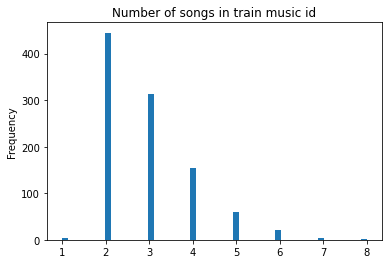

In [32]:
plt.hist(nof_songs_in_music, bins=50)
plt.gca().set(title='Number of songs in train music id', ylabel='Frequency');

# Convert all mp3 audio to wav audio

In [36]:
import subprocess
def preprocess_audio(source, target, sample_rate):
    p = subprocess.Popen(
        ["ffmpeg", "-i", source, "-ar", str(sample_rate), target, "-loglevel", "quiet"]
    )
    p.wait()

def convert_wav(audio_dir, _audio_ext='.mp3'):
    for fp in glob.glob(audio_dir + '/*' + _audio_ext):
        source_file = fp
        target_file = os.path.splitext(fp)[0] + '.wav'
        preprocess_audio(source_file, target_file, sample_rate=16000)

In [37]:
# convert_wav('train/hum')
# convert_wav('train/song')
# convert_wav('public_test/hum')
# convert_wav('public_test/full_song)')

# Analyze sample from train data

In [8]:
music_to_songs['1073742791']

['train/song/0538.mp3',
 'train/song/1593.mp3',
 'train/song/2447.mp3',
 'train/song/2630.mp3']

In [9]:
# from playsound import playsound
# playsound('train/song/1593.mp3')
# playsound('train/hum/1593.mp3')
# playsound('public_test/full_song/1073742791.mp3')

In [10]:
def preprocess(audio):
    MIN_VALUE = 0.004
    n = len(audio)
    left = 0
    while (left < n and abs(audio[left]) < MIN_VALUE):
        left += 1
    right = n - 1
    while (right >= 0 and abs(audio[right]) < MIN_VALUE):
        right -= 1
    if (left < right):
        audio = audio[left:right+1]
    return audio   

## Waves form of song and hum

C:\ProgramData\Miniconda3\envs\deeplearning\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


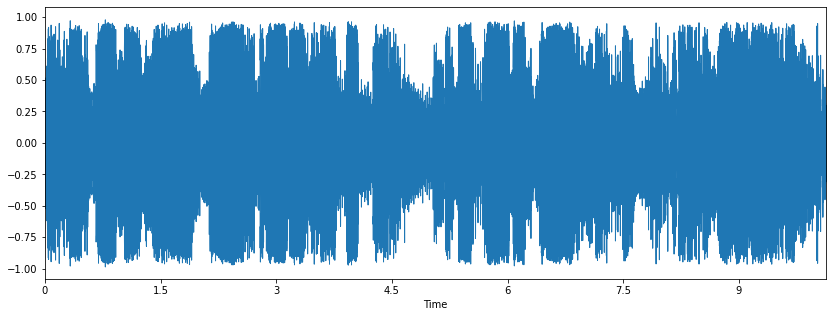

In [11]:
song_path = 'train/song/1593.mp3'
song, song_sr = librosa.load(song_path, sr=None)
song = preprocess(song)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(song, sr=song_sr)

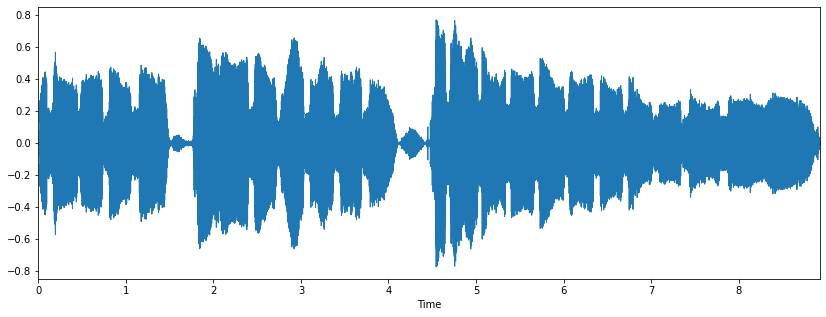

In [12]:
hum_path = 'train/hum/1593.mp3'
hum, hum_sr = librosa.load(hum_path, sr=None)
hum = preprocess(hum)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(hum, sr=hum_sr)

## Mel-spectrogram of song and hum

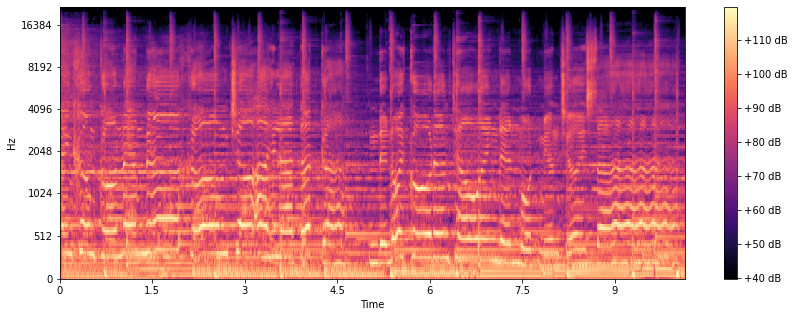

In [13]:
A_stft = librosa.stft(song)
A_mag, _ = librosa.magphase(A_stft)  # seperate magnitude and phase
A_mel = librosa.feature.melspectrogram(S=A_mag, sr=song_sr)
A_db = librosa.amplitude_to_db(A_mel, ref=np.min)

plt.figure(figsize=(14, 5))
librosa.display.specshow(A_db, sr=song_sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

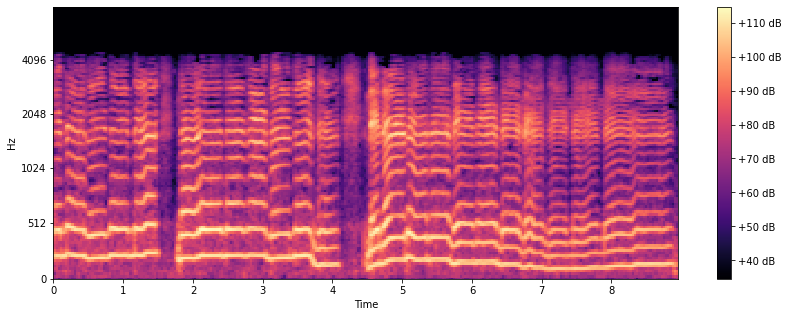

In [14]:
A_stft = librosa.stft(hum)
A_mag, _ = librosa.magphase(A_stft)
A_mel = librosa.feature.melspectrogram(S=A_mag, sr=hum_sr)
A_db = librosa.amplitude_to_db(A_mel, ref=np.min)

plt.figure(figsize=(14, 5))
librosa.display.specshow(A_db, sr=hum_sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')